# Project : Netflix Visualization and Recomendation System

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# This project required to do

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Recomendation System

# About Dataset

Dataset Source : https://www.kaggle.com/datasets/shivamb/netflix-shows

SHOW-ID - Unique id of each show (not much of a use for us in this notebook)

TYPE - The category of a show, can be either a Movie or a TV Show

TITLE - Name of the show

DIRECTOR - Name of the director(s) of the show

CAST - Name of the show

COUNTRY - Name of countries the show is available to watch on Netflix

DATE ADDED - Date when the show was added on Netflix

RATING - Show rating on netflix

RELEASE YEAR - Release year of the show

DURATION - Time duration of the show

LISTED IN - Genre of the show


# Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [3]:
netflix = pd.read_csv("/content/drive/MyDrive/Dataset/netflix_titles.csv") #To load dataset in the drive

In [4]:
netflix.head() #To show 5 columns on head from dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Exploratory Data Analysis

### Missing Values and Duplicated Values

In [5]:
netflix.info() #To show the count and datatypes columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Observation


1. There are 8807 rows and 12 columns
2. 11 of the columns are object 
3. 1 column is an int
4. There are missing values in some columns

In [ ]:
netflix.isnull().sum() #To check missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

There are missing values in director, cast, country, date_added columns, rating, and duration columns

In [ ]:
netflix.duplicated().sum() #To check duplicated rows

0

In [ ]:
netflix.describe() #To show statistical description in numerical columns

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


There are no duplicated values

#### Handling Missing Values

In [6]:
netflix['director'] = netflix['director'].fillna('')
netflix['cast'] = netflix['cast'].fillna('')
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
netflix['date_added'] = netflix['date_added'].fillna(netflix['date_added'].mode()[0])
netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])

In [7]:
netflix.isnull().sum() #Recheck missing values

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

Now, Only duration column have a missing value and need to be checking

In [8]:
netflix[netflix.duration.isnull()] #To show 'duration' column in dataset that have missing value only

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


So the director column with 'Louis C.K.' have missing values in 'duraion' column. and the 'rating' column is not supposed to be that

In [9]:
netflix[netflix.director == 'Louis C.K.'].head() #To make sure that duration have missing value with column director that have 'Louis C.K.'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [10]:
#To fill in the swapped columns between duration and rating column
netflix.loc[netflix['director'] == 'Louis C.K.', 'duration'] = netflix['rating'] 
netflix[netflix.director == 'Louis C.K.'].head()
#To recheck and make sure the column has changed

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


1. The column 'duration' is filled
2. The column 'rating' need to replace with 'NoData'

In [11]:
netflix.loc[netflix['director'] == 'Louis C.K.', 'rating'] = '' #To fill 'rating' column with ''
netflix[netflix.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,,66 min,Movies,The comic puts his trademark hilarious/thought...


The 'rating' column is already fill with 'NoData'

In [12]:
netflix.info() #Recheck dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


All columns is good

# Visualization

In [ ]:
netflix.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

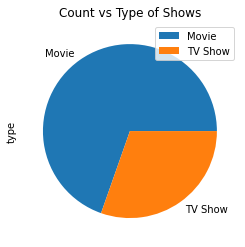

In [ ]:
netflix.type.value_counts().plot(kind = 'pie')
plt.title('Count vs Type of Shows')
plt.legend()
plt.show()

Netflix has more movie than TV Show

In [ ]:
netflix['country'].value_counts().head(10)

United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [ ]:
movie_countries = netflix[netflix['type']=='Movie']
tv_show_countries = netflix[netflix['type']=='TV Show']


Text(0.5, 1.0, 'Top 10 countries  producing movies in Netflix')

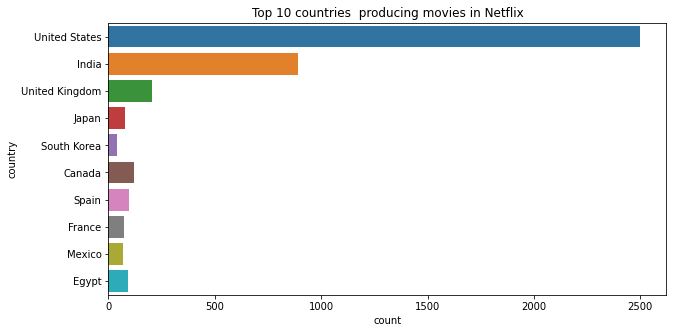

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(y = 'country', order=netflix['country'].value_counts().index[0:10], data=movie_countries)
plt.title('Top 10 countries  producing movies in Netflix')


United States has producing Movies in Netflix more than 2000

Text(0.5, 1.0, 'Top 10 Countries Producing TV shows in Netflix')

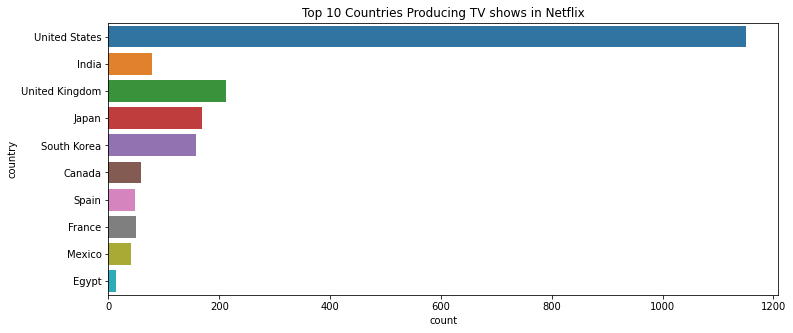

In [ ]:

plt.figure(figsize= (12,5))
sns.countplot(y = 'country', order=netflix['country'].value_counts().index[0:10], data=tv_show_countries)
plt.title('Top 10 Countries Producing TV shows in Netflix')


United States has producing TV Show in Netflix more than 700

In [ ]:
netflix.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
NoData         3
UR             3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Ratings of Shows on Netflix vs count')

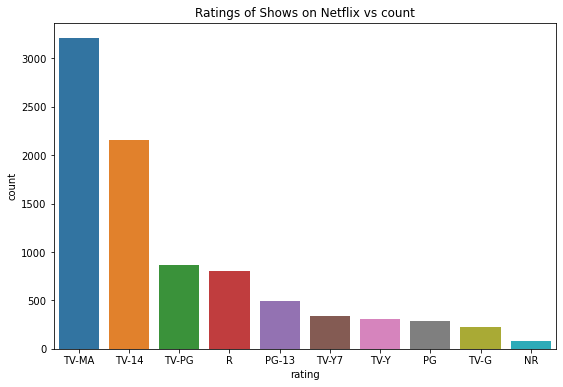

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x='rating' ,order = netflix['rating'].value_counts().index[0:10], data = netflix)
plt.title('Ratings of Shows on Netflix vs count')

Most of The Shows has TV-MA and TV-14 ratings

In [ ]:
netflix.release_year.value_counts()[:20]

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Content Release in Years on Nteflix vs Count')

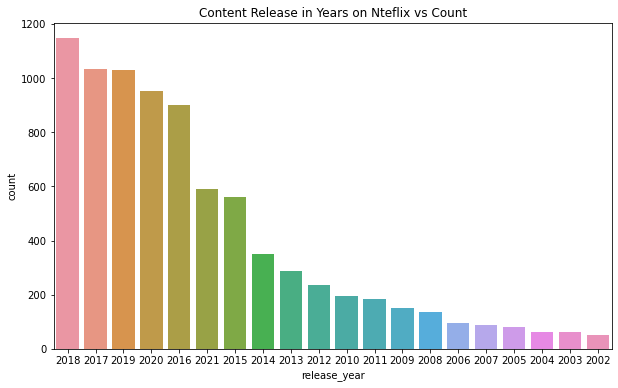

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='release_year' ,order = netflix['release_year'].value_counts().index[0:20], data = netflix)
plt.title('Content Release in Years on Nteflix vs Count')

Content release in years on Netflix is in 2018

In [13]:
netflix.listed_in.value_counts()[:20]

Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Independent M

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

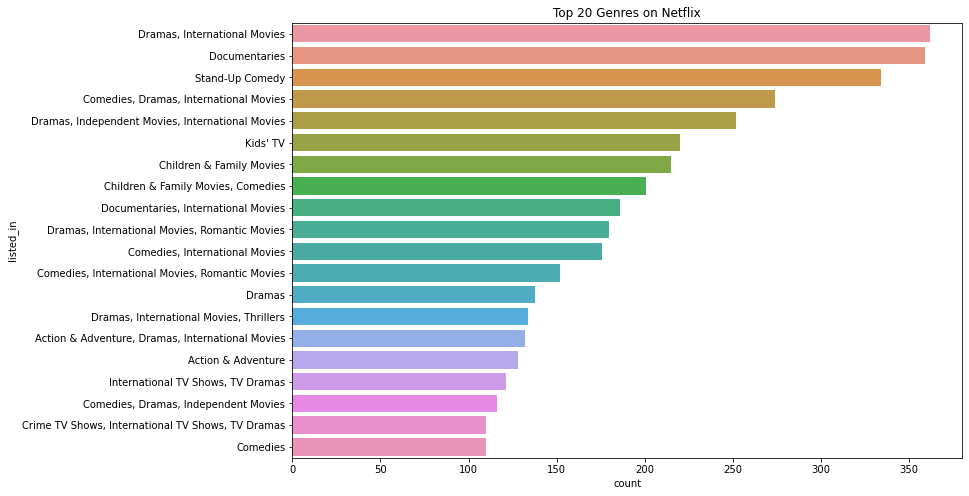

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(y='listed_in' ,order = netflix['listed_in'].value_counts().index[0:20], data = netflix)
plt.title('Top 20 Genres on Netflix')

The most popular genre in Nteflix are International Drama Movies and Drama

Summary

1. Netflix has more movies than TV Shows
2. Most number of Movies and TV Shows are produced by United States and India
3. Most of the Content on Netflix Movies and TV Shows is for Mature Audience
4. in 2018 is the year in wich netflix release a lot more content as compared to other years
5. International Movies and Drama are the most popular Genre on Netflix

# Recomendation System on Netflix

#### Content Based Filtering

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix['description'] = netflix['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming
# the data
tfidf_matrix = tfidf.fit_transform(netflix['description'])

#O/p the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

In [15]:
#Linear Kernel
from sklearn.metrics.pairwise import linear_kernel

#Cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [16]:
indices = pd.Series(netflix.index, index = netflix['title']).drop_duplicates()

In [17]:
indices

title
Dick Johnson Is Dead        0
Blood & Water               1
Ganglands                   2
Jailbirds New Orleans       3
Kota Factory                4
                         ... 
Zodiac                   8802
Zombie Dumb              8803
Zombieland               8804
Zoom                     8805
Zubaan                   8806
Length: 8807, dtype: int64

In [18]:
#Defining Recomendation System
def get_recommendation(title, cosine_sim=cosine_sim):
    idx = indices[title]
    
    #Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    #Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top 10 similar movies
    return netflix['title'].iloc[movie_indices]


I want to try get recomendation 'Peaky Blinders'

In [19]:
get_recommendation('Peaky Blinders') #To get recomendation film

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

In [ ]:
get_recommendation('Friends')

7397        Manhattan Romance
3369          BoJack Horseman
964       Things Heard & Seen
5090                 Episodes
4096                Studio 54
6549               Dad's Army
4964        Trailer Park Boys
4265     Single Ladies Senior
682     Why Are You Like This
2403                   Menahi
Name: title, dtype: object

In [ ]:
get_recommendation('Blood & Water')

5344    Message from the King
1884      Walk Away from Love
4285                    Lilli
4271               Lion Pride
4209               Next Enti?
613                 Voiceless
108                 Dive Club
1905             Cold Harbour
6289                  Bewafaa
5485                Ram Jaane
Name: title, dtype: object

In [ ]:
get_recommendation('Voiceless')

3299                   U Turn
6116    All Dogs Go to Heaven
1677          My Amnesia Girl
4487     Accidentally in Love
1825                 The Kite
3800           The Perfection
1               Blood & Water
7939     Sarvopari Palakkaran
7935              Sarah's Key
3438                    After
Name: title, dtype: object

In [ ]:
get_recommendation('Gotham')

7053        Ideachi Kalpana
150             In Too Deep
7335      Look Out, Officer
1972                  Black
5589    Operações Especiais
1769                  Voice
3753         Murder Mystery
1426              Gangaajal
6386           Buffalo Boys
4456         Raja Natwarlal
Name: title, dtype: object

The model is well, but it does not accurate

In [20]:
clear=netflix.fillna('')
clear.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
def clean_data(x):
    return str.lower(x.replace(" ",""))

In [22]:
#Feature 
features=['title', 'director', 'cast', 'listed_in', 'description']
clear=clear[features]

In [23]:
for feature in features:
    clear[feature] = clear[feature].apply(clean_data)
    
clear.head()

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."
3,jailbirdsneworleans,,,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein..."
4,kotafactory,,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...","internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...


In [24]:
def create_soup(x):
    return x['title']+ ' '+ x['director']+ ' '+ x['cast']+ ' ' + x['listed_in']+ ' ' +x['description']

In [25]:
clear['soup'] = clear.apply(create_soup, axis=1)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [27]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(clear['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [28]:
clear = clear.reset_index()
indices = pd.Series(clear.index, index=clear['title'])

In [29]:
#Redefining Model
def get_recommendation_film(title, cosine_sim=cosine_sim):
    title = title.replace(' ', '').lower()
    idx = indices[title]
    
    #Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    
    #Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    #Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top 10 similar movies
    return netflix['title'].iloc[movie_indices]

In [30]:
get_recommendation_film('Peaky Blinders', cosine_sim2)

3034                    Giri / Haji
5032    The Frankenstein Chronicles
8431          The Murder Detectives
4951                         Loaded
4809                  Kiss Me First
6922                   Happy Valley
2184                       Get Even
519                   I AM A KILLER
3789                 Killer Ratings
4476          Terrorism Close Calls
Name: title, dtype: object